# Conformal Prediction - A Practical Guide with MAPIE


## MAPIE Conformal Prediction


In [2]:
!pip install mapie

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 3.1 MB/s eta 0:00:00


In [3]:
# Import libraries

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### MAPIE Classification


In [4]:
from sklearn import naive_bayes
from mapie.classification import MapieClassifier
from mapie.metrics import classification_coverage_score, classification_mean_width_score

### MAPIE Quantile Regression


In [5]:
!pip install lightgbm

In [6]:
from mapie.quantile_regression import MapieQuantileRegressor
from lightgbm import LGBMRegressor
from mapie.metrics import regression_coverage_score, regression_mean_width_score

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold

# fit a Quantile LightGBM model
clf = LGBMRegressor(objective="quantile", alpha=0.05, random_state=42)

# optimize the model
params_distributions = dict(
    num_leaves=np.random.randint(10, 50, 11),
    max_depth=np.random.randint(3, 20, 6),
    n_estimators=np.random.randint(50, 300, 100),
    learning_rate=np.random.uniform(0.01, 0.1, 10),
)

optim_model = RandomizedSearchCV(
    clf,
    param_distributions=params_distributions,
    n_jobs=-1,
    n_iter=100,
    cv=KFold(n_splits=5, shuffle=True),
    verbose=-1,
)

optim_model.fit(X_train, y_train)
clf = optim_model.best_estimator_

### MAPIE Time Series


In [7]:
!pip install xgboost

In [8]:
from mapie.time_series_regression import MapieTimeSeriesRegressor
from mapie.subsample import BlockBootstrap
from sklearn.model_selection import RandomizedSearchCV, KFold
import xgboost as xgb

In [11]:
ls

sales.csv  sample_data/


In [12]:
# load sales data
df = pd.read_csv("/content/sales.csv")
df["date"] = pd.to_datetime(df["date"])
df = df.set_index("date")
df.head()

,sales
date,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


In [13]:
df.tail()

,sales
date,
1975-08-01,858.0
1975-09-01,817.0
1975-10-01,827.0
1975-11-01,797.0
1975-12-01,843.0


Text(0, 0.5, 'Sales')

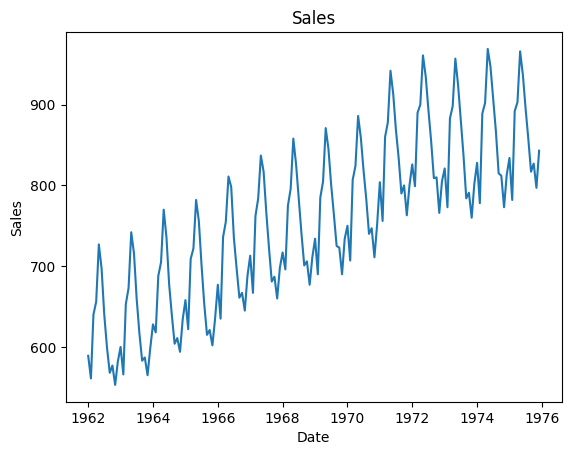

In [14]:
# create features
df["month"] = df.index.month
df["year"] = df.index.year

# plot the data
plt.plot(df["sales"])
plt.title("Sales")
plt.xlabel("Date")
plt.ylabel("Sales")

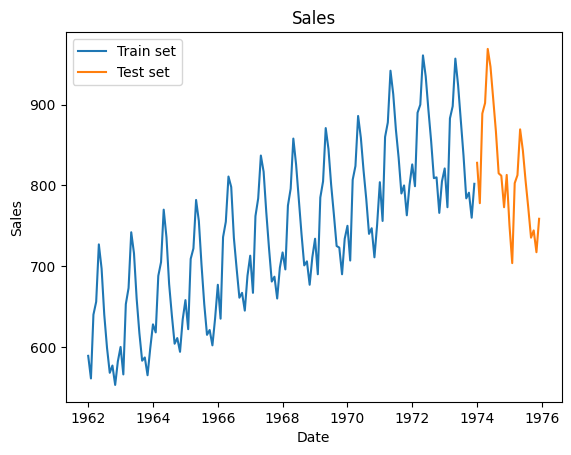

In [15]:
# create train and test sets
X = df.drop(["sales"], axis=1)
y = df["sales"]

# split the data where test is eveyrthing after 1974
X_train = X[X.index.year < 1974]
X_test = X[X.index.year >= 1974]
y_train = y[y.index.year < 1974]
y_test = y[y.index.year >= 1974]

# introduce a change in seasonality after 1975 in the y_test set by applying a 10% drop
y_test.loc[y_test.index.year >= 1975] = y_test.loc[y_test.index.year >= 1975] * 0.9

# plot the data whole data and colored train and test sets
plt.plot(X_train.index, y_train, label="Train set")
plt.plot(X_test.index, y_test, label="Test set")
plt.title("Sales")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()

In [ ]:
# X_train = X[X.index.year < 1974]
# X_test = X[X.index.year >= 1974]
# y_train = y[y.index.year < 1974]
# y_test = y[y.index.year >= 1974]

In [18]:
X_train.tail()

,month,year
date,,
1973-08-01,8,1973
1973-09-01,9,1973
1973-10-01,10,1973
1973-11-01,11,1973
1973-12-01,12,1973


In [19]:
X_test.head()

,month,year
date,,
1974-01-01,1,1974
1974-02-01,2,1974
1974-03-01,3,1974
1974-04-01,4,1974
1974-05-01,5,1974


In [22]:
y_train.head()

date
1962-01-01    589.0
1962-02-01    561.0
1962-03-01    640.0
1962-04-01    656.0
1962-05-01    727.0
Name: sales, dtype: float64

<Axes: xlabel='date'>

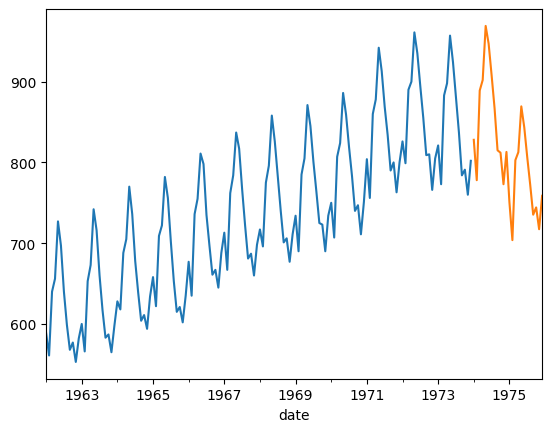

In [23]:
y_train.plot()
y_test.plot()

In [24]:
reg = xgb.XGBRegressor(n_estimators=1000, random_state=42)

# optimize the model
params_distributions = dict(
    max_depth=np.random.randint(3, 20, 5),
    learning_rate=np.random.uniform(0.01, 0.1, 10),
)

reg = RandomizedSearchCV(
    reg,
    param_distributions=params_distributions,
    n_jobs=-1,
    n_iter=10,
    cv=KFold(n_splits=5, shuffle=True),
    verbose=-1,
)

reg.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, gpu_id=None,
                                          grow_policy=None,
                                          importance_type=N...
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=1000, n_jobs=None,
                                          num_parallel_tree=None,
                                          predictor=None, random_state=42, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': array([0.09196507, 0.08929761, 0.09514701, 0.06980836, 0.08478854,
       0.02168793, 0.02200269, 0.04727025, 0.0920255 , 0.0809469 ]),
                                        'max_depth': array([12,  5, 11, 13, 11])},
                   verbose=-1)

In [25]:
# It's Confromal Prediction time!
alpha = 0.05
gap = 1

mapie_cv = BlockBootstrap(n_blocks=10, overlapping=True, random_state=42)

mapie_enbpi = MapieTimeSeriesRegressor(
    reg, method="enbpi", cv=mapie_cv, agg_function="mean", n_jobs=-1
)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:67: FutureWarning: Class MapieTimeSeriesRegressor is deprecated; WARNING: Deprecated path to import MapieTimeSeriesRegressor. Please prefer the new path: [form mapie.regression import MapieTimeSeriesRegressor].
  warnings.warn(msg, category=FutureWarning)


In [26]:
mapie_enbpi = mapie_enbpi.fit(X_train, y_train)
y_pred_npfit, y_pis_npfit = mapie_enbpi.predict(
    X_test, alpha=alpha, ensemble=True, optimize_beta=True
)
coverage_npfit = regression_coverage_score(
    y_test, y_pis_npfit[:, 0, 0], y_pis_npfit[:, 1, 0]
)
width_npfit = regression_mean_width_score(y_pis_npfit[:, 0, 0], y_pis_npfit[:, 1, 0])

In [27]:
mapie_enbpi = mapie_enbpi.fit(X_train, y_train)

y_pred_pfit = np.zeros(y_pred_npfit.shape)
y_pis_pfit = np.zeros(y_pis_npfit.shape)
conformity_scores_pfit = []
lower_quantiles_pfit = []
higher_quantiles_pfit = []
y_pred_pfit[:gap], y_pis_pfit[:gap, :, :] = mapie_enbpi.predict(
    X_test.iloc[:gap, :], alpha=alpha, ensemble=True, optimize_beta=True
)
for step in range(gap, len(X_test), gap):
    mapie_enbpi.partial_fit(
        X_test.iloc[(step - gap) : step, :],
        y_test.iloc[(step - gap) : step],
    )
    (
        y_pred_pfit[step : step + gap],
        y_pis_pfit[step : step + gap, :, :],
    ) = mapie_enbpi.predict(
        X_test.iloc[step : (step + gap), :],
        alpha=alpha,
        ensemble=True,
        optimize_beta=True,
    )
    conformity_scores_pfit.append(mapie_enbpi.conformity_scores_)
    lower_quantiles_pfit.append(mapie_enbpi.lower_quantiles_)
    higher_quantiles_pfit.append(mapie_enbpi.higher_quantiles_)
coverage_pfit = regression_coverage_score(
    y_test, y_pis_pfit[:, 0, 0], y_pis_pfit[:, 1, 0]
)
width_pfit = regression_mean_width_score(y_pis_pfit[:, 0, 0], y_pis_pfit[:, 1, 0])

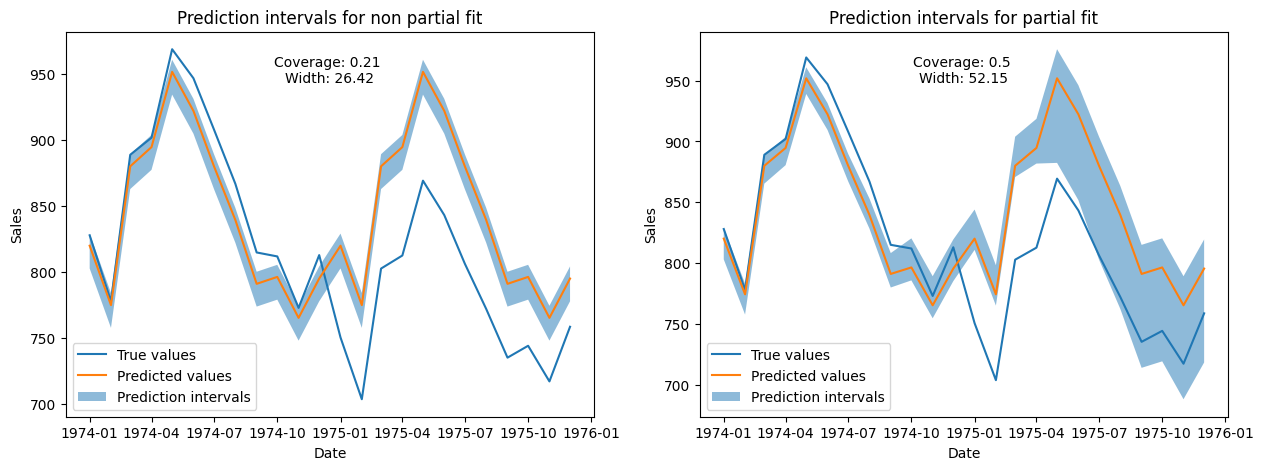

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.plot(y_test.index, y_test, label="True values")
ax1.plot(y_test.index, y_pred_npfit, label="Predicted values")
ax1.fill_between(
    y_test.index,
    y_pis_npfit[:, 0, 0],
    y_pis_npfit[:, 1, 0],
    alpha=0.5,
    label="Prediction intervals",
)
ax1.set_title("Prediction intervals for non partial fit")
ax1.text(
    0.5,
    0.9,
    f"Coverage: {round(coverage_npfit,2 )} \nWidth: {round(width_npfit,2)}",
    horizontalalignment="center",
    verticalalignment="center",
    transform=ax1.transAxes,
)
ax1.set_xlabel("Date")
ax1.set_ylabel("Sales")
ax1.legend()

ax2.plot(y_test.index, y_test, label="True values")
ax2.plot(y_test.index, y_pred_pfit, label="Predicted values")
ax2.fill_between(
    y_test.index,
    y_pis_pfit[:, 0, 0],
    y_pis_pfit[:, 1, 0],
    alpha=0.5,
    label="Prediction intervals",
)
ax2.set_title("Prediction intervals for partial fit")
ax2.text(
    0.5,
    0.9,
    f"Coverage: {round(coverage_pfit,2)} \nWidth: {round(width_pfit, 2)}",
    horizontalalignment="center",
    verticalalignment="center",
    transform=ax2.transAxes,
)
ax2.set_xlabel("Date")
ax2.set_ylabel("Sales")
ax2.legend()